In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from math import floor

In [3]:
operation_count = 0

def generate_random_matrix(size):
    return np.random.uniform(1e-8, 1.0, (size, size))

def is_power_of_two(n):
    return n > 0 and (n & (n - 1)) == 0

def is_the_right_size(matrix):
    rows, columns = matrix.shape
    return rows == columns and is_power_of_two(rows)

def pad_to_power_of_two(matrix):
    rows, cols = matrix.shape
    new_size = 1 << max(rows, cols).bit_length()

    padded_matrix = np.zeros((new_size, new_size))
    padded_matrix[:rows, :cols] = matrix

    return padded_matrix

def restore_original(matrix, size):
    return matrix[:size, :size]

Algorytm Binét’a

In [4]:
def matrix_mult_recursive(A, B):
    global operation_count

    n = A.shape[0]

    if n == 1:
        operation_count += 1
        return A * B
    
    mid = n // 2

    A11 = A[:mid, :mid]
    A12 = A[:mid, mid:]
    A21 = A[mid:, :mid]
    A22 = A[mid:, mid:]

    B11 = B[:mid, :mid]
    B12 = B[:mid, mid:]
    B21 = B[mid:, :mid]
    B22 = B[mid:, mid:]

    C11 = matrix_mult_recursive(A11, B11) + matrix_mult_recursive(A12, B21)
    C12 = matrix_mult_recursive(A11, B12) + matrix_mult_recursive(A12, B22)
    C21 = matrix_mult_recursive(A21, B11) + matrix_mult_recursive(A22, B21)
    C22 = matrix_mult_recursive(A21, B12) + matrix_mult_recursive(A22, B22)

    operation_count += n * n

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

    return C

In [5]:
A = generate_random_matrix(8)
B = generate_random_matrix(8)

C1 = matrix_mult_recursive(A, B)
C2 = A @ B

if np.allclose(C1, C2):
    print("Success")

else:
    print("Incorrect result")


Success


Algorytm Strassena

In [6]:
def add_matrix(A, B):
    global operation_count
    operation_count += A.shape[0] * B.shape[0]
    return A + B

def sub_matrix(A, B):
    global operation_count
    operation_count += A.shape[0] * B.shape[0]
    return A - B

In [7]:
def strassen_recursive(A, B):
    global operation_count

    n = A.shape[0]

    if n == 1:
        operation_count += 1
        return A * B
    
    mid = n // 2

    A11 = A[:mid, :mid]
    A12 = A[:mid, mid:]
    A21 = A[mid:, :mid]
    A22 = A[mid:, mid:]

    B11 = B[:mid, :mid]
    B12 = B[:mid, mid:]
    B21 = B[mid:, :mid]
    B22 = B[mid:, mid:]

    P1 = strassen_recursive(add_matrix(A11, A22), add_matrix(B11, B22))
    P2 = strassen_recursive(add_matrix(A21, A22), B11)
    P3 = strassen_recursive(A11, sub_matrix(B12, B22))
    P4 = strassen_recursive(A22, sub_matrix(B21, B11))
    P5 = strassen_recursive(add_matrix(A11, A12), B22)
    P6 = strassen_recursive(sub_matrix(A21, A11), add_matrix(B11, B12))
    P7 = strassen_recursive(sub_matrix(A12, A22), add_matrix(B21, B22))

    C11 = add_matrix(sub_matrix(add_matrix(P1, P4), P5), P7)
    C12 = add_matrix(P3, P5)
    C21 = add_matrix(P2, P4)
    C22 = add_matrix(sub_matrix(add_matrix(P1, P3), P2), P6)

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

    return C

In [8]:
A = generate_random_matrix(8)
B = generate_random_matrix(8)

C1 = strassen_recursive(A, B)
C2 = A @ B

if np.allclose(C1, C2):
    print("Success")

else:
    print("Incorrect result")

Success


Metoda AI z artykułu w Nature

In [9]:
def next_power_of_four(n):
    val = 1
    while (val) < n:
        val *= 4
    return val

    # x = floor(n**(1/4))

    # if ((4 ** x) == n):
    #     return n
    # else:
    #     return 4 ** (x + 1)
    
def next_power_of_five(n):
    val = 1
    while (val) < n:
        val *= 5
    return val

    # x = floor(n**(1/5))

    # if ((5 ** x) == n):
    #     return n
    # else:
    #     return 5 ** (x + 1)


def pad_to_4n_5n(matrix):
    rows, cols = matrix.shape

    n_rows = next_power_of_four(rows)
    n_cols = next_power_of_five(cols)

    padded_matrix = np.zeros((n_rows, n_cols))

    padded_matrix[:rows, :cols] = matrix

    return padded_matrix

def pad_to_5n(matrix):
    rows, cols = matrix.shape

    new_size = next_power_of_five(max(rows, cols))

    padded_matrix = np.zeros((new_size, new_size))

    padded_matrix[:rows, :cols] = matrix

    return padded_matrix

In [10]:
def ai_recursive(A, B):

    C = np.ndarray((4, 5))

    h1 = A[2, 1] * (-B[1, 0] - B[1, 4] - B[2, 0])
    h2 = (A[1, 1] + A[1, 4] - A[2, 4]) * (-B[1, 4] - B[4, 0])
    h3 = (-A[2, 0] - A[3, 0] + A[3, 1]) * (-B[0, 0] + B[1, 4])
    h4 = (A[0, 1] + A[0, 3] + A[2, 3]) * (-B[1, 4] - B[3, 0])
    h5 = (A[0, 4] + A[1, 1] + A[1, 4]) * (-B[1, 3] + B[4, 0])
    h6 = (-A[1, 1] - A[1, 4] - A[3, 4]) * (B[1, 2] + B[4, 0])
    h7 = (-A[0, 0] + A[3, 0] - A[3, 1]) * (B[0, 0] + B[1, 3])
    h8 = (A[2, 1] - A[2, 2] - A[3, 2]) * (-B[1, 2] + B[2, 0])
    h9 = (-A[0, 1] - A[0, 3] + A[3, 3]) * (B[1, 2] + B[3, 0])
    h10 = (A[1, 1] + A[1, 4]) * B[4, 0]
    h11 = (-A[1, 0] - A[3, 0] + A[3, 1]) * (-B[0, 0] + B[1, 1])
    h12 = (A[3, 0] - A[3, 1]) * B[0, 0]
    h13 = (A[0, 1] + A[0, 3] + A[1, 3]) * (B[1, 1] + B[3, 0])
    h14 = (A[0, 2] - A[2, 1] + A[2, 2]) * (B[1, 3] + B[2, 0])
    h15 = (-A[0, 1] - A[0, 3]) * B[3, 0]
    h16 = (-A[2, 1] + A[2, 2]) * B[2, 0]
    h17 = (A[0, 1] + A[0, 3] - A[1, 0] + A[1, 1] - A[1, 2] + A[1, 3] - A[2, 1] + A[2, 2] - A[3, 0] + A[3, 1]) * B[1, 1]
    h18 = A[1, 0] * (B[0, 0] + B[0, 1] + B[4, 1])
    h19 = -A[1, 2] * (B[2, 0] + B[2, 1] + B[4, 1])
    h20 = (-A[0, 4] + A[1, 0] + A[1, 2] - A[1, 4]) * (-B[0, 0] - B[0, 1] + B[0, 3] - B[4, 1])
    h21 = (A[1, 0] + A[1, 2] - A[1, 4]) * B[4, 1]
    h22 = (A[0, 2] - A[0, 3] - A[1, 3]) * (B[0, 0] + B[0, 1] - B[0, 3] - B[2, 0] - B[2, 1] + B[2, 3] + B[3, 3])
    h23 = A[0, 2] * (-B[2, 0] + B[2, 3] + B[3, 3])
    h24 = A[0, 4] * (-B[3, 3] - B[4, 0] + B[4, 3])
    h25 = -A[0, 0] * (B[0, 0] - B[0, 3])
    h26 = (-A[0, 2] + A[0, 3] + A[0, 4]) * B[3, 3]
    h27 = (A[0, 2] - A[2, 0] + A[2, 2]) * (B[0, 0] - B[0, 3] + B[0, 4] + B[2, 4])
    h28 = -A[2, 3] * (-B[2, 4] - B[3, 0] - B[3, 4])
    h29 = A[2, 0] * (B[0, 0] + B[0, 4] + B[2, 4])
    h30 = (A[2, 0] - A[2, 2] + A[2, 3]) * B[2, 4]
    h31 = (-A[0, 3] - A[0, 4] - A[2, 3]) * (-B[3, 3] - B[4, 0] + B[4, 3] - B[4, 4])
    h32 = (A[1, 0] + A[3, 0] + A[3, 3]) * (B[0, 2] - B[3, 0] - B[3, 1] - B[3, 2])
    h33 = A[3, 2] * (-B[2, 0] - B[2, 2])
    h34 = A[3, 3] * (-B[0, 2] + B[3, 0] + B[3, 2])
    h35 = -A[3, 4] * (B[0, 2] + B[4, 0] + B[4, 2])
    h36 = (A[1, 2] - A[1, 4] - A[3, 4]) * (B[2, 0] + B[2, 1] + B[2, 2] + B[4, 1])
    h37 = (-A[3, 0] - A[3, 3] + A[3, 4]) * B[0, 2]
    h38 = (-A[1, 2] - A[2, 0] + A[2, 2] - A[2, 3]) * (B[2, 4] + B[3, 0] + B[3, 1] +B[3, 4])
    h39 = (-A[2, 0]- A[3, 0] - A[3, 3] + A[3, 4]) * (B[0, 2] + B[4, 0] + B[4, 2] + B[4, 4])
    h40 = (-A[0, 2] + A[0, 3] + A[0, 4] - A[3, 3]) * (-B[2, 0] - B[2, 2] + B[2, 3] + B[3, 3])
    h41 = (-A[0, 0] + A[3, 0] - A[3, 4]) * (B[0, 2] + B[2, 0] + B[2, 2] - B[2, 3] + B[4, 0] + B[4, 2] - B[4, 3])
    h42 = (-A[1, 0] + A[1, 4] - A[2, 4]) * (-B[0, 0] - B[0, 1] - B[0, 4] + B[3, 0] + B[3, 1] + B[3, 4] - B[4, 1])
    h43 = A[1, 3] * (B[3, 0] + B[3, 1])
    h44 = (A[1, 2] + A[2, 1] - A[2, 2]) * (B[1, 1] - B[2, 0])
    h45 = (-A[2, 2] + A[2, 3] - A[3, 2]) * (B[2, 4] + B[3, 0] + B[3, 2] + B[3, 4] + B[4, 0] + B[4, 2] + B[4, 4])
    h46 = -A[2, 4] * (-B[4, 0] - B[4, 4])
    h47 = (A[1, 0] - A[1, 4] - A[2, 0] + A[2, 4]) * (B[0, 0] + B[0, 1] + B[0, 4] - B[3, 0] - B[3, 1] - B[3, 4])
    h48 = (-A[1, 2] + A[2, 2]) * (B[1, 1] + B[2, 1] + B[2, 4] + B[3, 0] + B[3, 1] + B[3, 4])
    h49 = (-A[0, 0] - A[0, 2] + A[0, 3] + A[0, 4] - A[1, 0] - A[1, 2] + A[1, 3] + A[1, 4]) * (-B[0, 0] - B[0, 1] + B[0, 3])
    h50 = (-A[0, 3] - A[1, 3]) * (B[1, 1] - B[2, 0] - B[2, 1] + B[2, 3] - B[3, 1] + B[3, 3])
    h51 = A[1, 1] * (B[1, 0] + B[1, 1] - B[4, 0])
    h52 = A[3, 1] * (B[0, 0] + B[1, 0] + B[1, 2])
    h53 = -A[0, 1] * (-B[1, 0] + B[1, 3] + B[3, 0])
    h54 = (A[0, 1] + A[0, 3] - A[1, 1] - A[1, 4] - A[2, 1] +A[2, 2] - A[3, 1] + A[3, 2] - A[3, 3] - A[3, 4]) * B[1, 2]
    h55 = (A[0, 3] - A[3, 3]) * (-B[1, 2] + B[2, 0] + B[2, 2] - B[2, 3] + B[3, 2] - B[3, 3])
    h56 = (A[0, 0] - A[0, 4] - A[3, 0] + A[3, 4]) * (B[2, 0] + B[2, 2] - B[2, 3] + B[4, 0] + B[4, 2] - B[4, 3])
    h57 = (-A[2, 0] - A[3, 0]) * (-B[0, 2] - B[0, 4] - B[1, 4] - B[4, 0] - B[4, 2] - B[4, 4])
    h58 = (-A[0, 3] - A[0, 4] - A[2, 3] - A[2, 4]) * (-B[4, 0] + B[4, 3] - B[4, 4])
    h59 = (-A[2, 2] + A[2, 3] - A[3, 2] + A[3, 3]) * (B[3, 0] + B[3, 2] + B[3, 4] + B[4, 0] + B[4, 2] + B[4, 4])
    h60 = (A[1, 4] + A[3, 4]) * (B[1, 2] - B[2, 0] - B[2, 1] - B[2, 2] - B[4, 1] - B[4, 2])
    h61 = (A[0, 3] + A[2, 3]) * (B[0, 0] - B[0, 3] + B[0, 4] - B[1, 4] - B[3, 3] + B[3, 4] - B[4, 0] + B[4, 3] - B[4, 4])
    h62 = (A[1, 0] + A[3, 0]) * (B[0, 1] + B[0, 2] + B[1, 1] - B[3, 0] - B[3, 1] - B[3, 2])
    h63 = (-A[2, 2] - A[3, 2]) * (-B[1, 2] - B[2, 2] - B[2, 4] - B[3, 0] - B[3, 2] - B[3, 4])
    h64 = (A[0, 0] - A[0, 2] - A[0, 3] + A[2, 0] - A[2, 2] - A[2, 3]) * (B[0, 0] - B[0, 3] + B[0, 4])
    h65 = (-A[0, 0] + A[3, 0]) * (-B[0, 2] + B[0, 3] + B[1, 3] - B[4, 0] - B[4, 2] + B[4, 3])
    h66 = (A[0, 0] - A[0, 1] + A[0, 2] - A[0, 4] - A[1, 1] - A[1, 4] - A[2, 1] + A[2, 2] - A[3, 0] + A[3, 1]) * B[1, 3]
    h67 = (A[1, 4] - A[2, 4]) * (B[0, 0] + B[0, 1] + B[0, 4] - B[1, 4] - B[3, 0] - B[3, 1] - B[3, 4] + B[4, 1] + B[4, 4])
    h68 = (A[0, 0] + A[0, 2] - A[0, 3] - A[0, 4] - A[3, 0] - A[3, 2] + A[3, 3] + A[3, 4]) * (-B[2, 0] - B[2, 2] + B[2, 3])
    h69 = (-A[0, 2] + A[0, 3] - A[1, 2] + A[1, 3]) * (-B[1, 3] - B[2, 0] - B[2, 1] + B[2, 3] - B[4, 1] + B[4, 3])
    h70 = (A[1, 2] - A[1, 4] + A[3, 2] - A[3, 4]) * (-B[2, 0] - B[2, 1] - B[2, 2])
    h71 = (-A[2, 0] + A[2, 2] - A[2, 3] + A[2, 4] - A[3, 0] + A[3, 2] - A[3, 3] + A[3, 4]) * (-B[4, 0] - B[4, 2] - B[4, 4])
    h72 = (-A[1, 0] - A[1, 3] - A[3, 0] - A[3, 3]) * (B[3, 0] + B[3, 1] + B[3, 2])
    h73 = (A[0, 2] - A[0, 3] - A[0, 4] + A[1, 2] - A[1, 3] - A[1, 4]) * (B[0, 0] + B[0, 1] - B[0, 3] + B[1, 3] + B[4, 1] - B[4, 3])
    h74 = (A[1, 0] - A[1, 2] + A[1, 3] - A[2, 0] + A[2, 2] - A[2, 3]) * (B[3, 0] + B[3, 1] + B[3, 4])
    h75 = -(A[0, 1] + A[0, 3] - A[1, 1] - A[1, 4] - A[2, 0] + A[2, 1] + A[2, 3] + A[2, 4] - A[3, 0] + A[3, 1]) * B[1, 4]
    h76 = (A[0, 2] + A[2, 2]) * (-B[0, 0] + B[0, 3] - B[0, 4] + B[1, 3] + B[2, 3] - B[2, 4])

    C[0, 0] = -h10 + h12 + h14 - h15 - h16 + h53 + h5 - h66 - h7
    C[1, 0] = h10 + h11 - h12 + h13 + h15 + h16 - h17 - h44 + h51
    C[2, 0] = h10 - h12 + h15 + h16 - h1 + h2 + h3 - h4 + h75
    C[3, 0] = -h10 + h12 - h15 - h16 + h52 + h54 - h6 - h8 + h9
    C[0, 1] = h13 + h15 + h20 + h21 - h22 + h23 + h25 - h43 + h49 + h50
    C[1, 1] = -h11 + h12 - h13 - h15 - h16 + h17 + h18 - h19 - h21 + h43 + h44
    C[2, 1] = -h16 - h19 - h21 - h28 - h29 - h38 + h42 + h44 - h47 + h48
    C[3, 1] = h11 - h12 - h18 + h21 - h32 + h33 - h34 - h36 + h62 - h70
    C[0, 2] = h15 + h23 + h24 + h34 - h37 + h40 - h41 + h55 - h56 - h9
    C[1, 2] = -h10 + h19 + h32 + h35 + h36 + h37 - h43 - h60 - h6 - h72
    C[2, 2] = -h16 - h28 + h33 + h37 - h39 + h45 - h46 + h63 - h71 - h8
    C[3, 2] = h10 + h15 + h16 - h33 + h34 - h35 - h37 - h54 + h6 + h8 - h9
    C[0, 3] = -h10 + h12 + h14 - h16 + h23 + h24 + h25 + h26 + h5 - h66 - h7
    C[1, 3] = h10 + h18 - h19 + h20 - h22 - h24 - h26 - h5 - h69 + h73
    C[2, 3] = -h14 + h16 - h23 - h26 + h27 + h29 + h31 + h46 - h58 + h76
    C[3, 3] = h12 + h25 + h26 - h33 - h35 - h40 + h41 + h65 - h68 - h7
    C[0, 4] = h15 + h24 + h25+ h27 - h28 + h30 + h31 - h4 + h61 + h64
    C[1, 4] = -h10 - h18 - h2 - h30 - h38 + h42 - h43 + h46 + h67 + h74
    C[2, 4] = -h10 + h12 - h15 + h28 + h29 - h2 - h30 - h3 + h46 + h4 - h75
    C[3, 4] = -h12 - h29 + h30 - h34 + h35 + h39 + h3 - h45 + h57 + h59

    return C

In [11]:
A = generate_random_matrix(4)
B = generate_random_matrix(5)

A = pad_to_4n_5n(A)
B = pad_to_5n(B)

C1 = ai_recursive(A, B)
C2 = A @ B

if np.allclose(C1, C2):
    print("Success")

else:
    print("Incorrect result")

Success


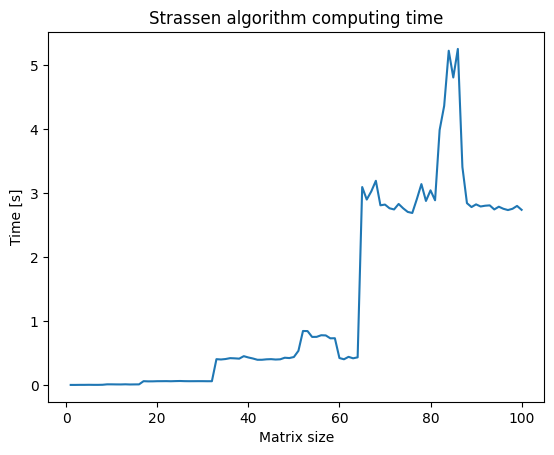

In [18]:
n = 100
x = np.linspace(1, n, n, dtype=np.int32)
y = np.array([])

for i in x:
    A = generate_random_matrix(i)
    B = generate_random_matrix(i)

    if not is_the_right_size(A):
        A = pad_to_power_of_two(A)
    if not is_the_right_size(B):
        B = pad_to_power_of_two(B)

    y = np.append(y, time.time())
    C = strassen_recursive(A, B)
    y[-1] = time.time() - y[-1]

#print(y)
plt.plot(x, y)
plt.title("Strassen algorithm computing time")
plt.xlabel("Matrix size")
plt.ylabel("Time [s]")
plt.show()